In [38]:
# Load necessary libraries and dataset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Electric_Vehicle_Population_Data 6.xlsx"
data = pd.read_excel(file_path)

In [39]:
# Define relevant columns
numerical_columns = ['Electric Range', 'Model Year','Income','Car Price Today', 'Car Price Launched']
categorical_columns = ['County','City','Make', 'Model', 'Electric Vehicle Type',
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']

print(data.shape)

data_relevant = data[numerical_columns + categorical_columns].dropna()

print(data_relevant.shape)

# Convert all categorical columns to string type before encoding
# This ensures all values within a column are of the same type (string)
for col in categorical_columns:
    data_relevant[col] = data_relevant[col].astype(str)

# Re-encode categorical features
# The 'sparse' argument has been replaced with 'sparse_output' in newer versions of scikit-learn
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data_relevant[categorical_columns])

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data_relevant[numerical_columns])

# Combine numerical and encoded categorical features
features_combined_reduced = np.hstack((scaled_numerical, encoded_categorical))

(204556, 20)
(204544, 12)


In [40]:
scaled_numerical.shape

(204544, 5)

In [41]:
features_combined_reduced.shape

(204544, 746)

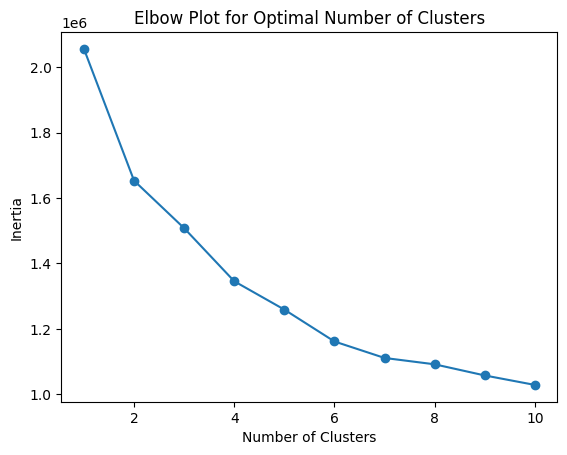

In [42]:
# elbow plot for different cluster number

# Create an empty list to store the inertia values
inertia_values = []

# Define a range of cluster numbers to try
cluster_range = range(1, 11)  # Try cluster numbers from 1 to 10

# Loop through different cluster numbers and calculate inertia
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_combined_reduced)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

In [43]:
# Perform K-Means clustering
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(features_combined_reduced)

# Assign cluster labels
data_relevant['Cluster'] = kmeans_final.labels_

# Analyze cluster sizes
cluster_counts_final = data_relevant['Cluster'].value_counts()

cluster_counts_final

,count
Cluster,
1,119005
0,33410
2,32519
3,19610


In [44]:
kmeans_final.cluster_centers_

array([[ 2.11113334, -0.87444015,  0.07046614, ...,  0.19754565,
         0.37461838,  0.02274768],
       [-0.5300487 ,  0.57137136, -0.00818175, ...,  0.20911726,
         0.3810176 ,  0.02008319],
       [ 0.08876409, -1.59940414, -0.17172339, ...,  0.21762662,
         0.25886405,  0.03742428],
       [-0.52733499,  0.67465681,  0.2143635 , ...,  0.17526772,
         0.45048445,  0.01713412]])

In [45]:
kmeans_final.cluster_centers_.shape

(4, 746)

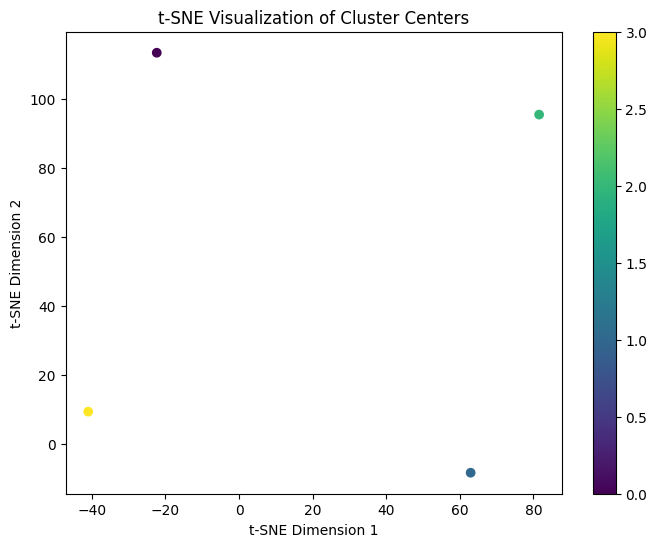

In [46]:
# tsne plot for these cluster centres

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming kmeans_final.cluster_centers_ contains the cluster centers

# Apply t-SNE to reduce the dimensionality of the cluster centers
# Set perplexity to a value less than the number of cluster centers (4 in this case)
tsne = TSNE(n_components=2, random_state=42, perplexity=3)  # perplexity should be < 4
cluster_centers_tsne = tsne.fit_transform(kmeans_final.cluster_centers_)

# Create a scatter plot of the reduced cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(cluster_centers_tsne[:, 0], cluster_centers_tsne[:, 1], c=range(kmeans_final.n_clusters), cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Cluster Centers')
plt.colorbar()
plt.show()

In [47]:
# interpret all 4  cluster centres in terms of mean statistic value of each column

# Assuming 'kmeans_final.cluster_centers_' and 'numerical_columns' are defined as in your code

# Create a DataFrame from the cluster centers
df_cluster_centers = pd.DataFrame(kmeans_final.cluster_centers_, columns=[f"Feature_{i}" for i in range(kmeans_final.cluster_centers_.shape[1])])


# Interpret the cluster centers in terms of the mean statistical value of each numerical column

# Get the indices of the numerical features in the combined feature matrix
numerical_feature_indices = list(range(len(numerical_columns)))

# Iterate through the cluster centers and print the mean values for numerical features
for cluster_num in range(4):
  print(f"\nCluster {cluster_num} Mean Values for Numerical Features:")
  for i in numerical_feature_indices:
      print(f"  - {numerical_columns[i]}: {df_cluster_centers.iloc[cluster_num, i]}")




Cluster 0 Mean Values for Numerical Features:
  - Electric Range: 2.1111333449926826
  - Model Year: -0.8744401545444802
  - Income: 0.0704661398820383
  - Car Price Today: -0.4117284535441436
  - Car Price Launched: 0.318294442094286

Cluster 1 Mean Values for Numerical Features:
  - Electric Range: -0.5300486997809705
  - Model Year: 0.5713713610219502
  - Income: -0.008181749810343357
  - Car Price Today: 0.10625450918321414
  - Car Price Launched: -0.2030609977787674

Cluster 2 Mean Values for Numerical Features:
  - Electric Range: 0.0887640923763393
  - Model Year: -1.5994041411634474
  - Income: -0.17172338994117586
  - Car Price Today: -1.2281677646295819
  - Car Price Launched: -0.8569427024597143

Cluster 3 Mean Values for Numerical Features:
  - Electric Range: -0.52733498514284
  - Model Year: 0.6746568083352225
  - Income: 0.21436350434565268
  - Car Price Today: 2.0933104184374933
  - Car Price Launched: 2.111064582947699


In [48]:
# Assuming kmeans_final.cluster_centers_ and numerical_columns are defined as in your code

# Create a DataFrame from the cluster centers
df_cluster_centers = pd.DataFrame(kmeans_final.cluster_centers_, columns=[f"Feature_{i}" for i in range(kmeans_final.cluster_centers_.shape[1])])

# Get the indices of the numerical features in the combined feature matrix
numerical_feature_indices = list(range(len(numerical_columns)))

# Iterate through the cluster centers and print the mean values for numerical features
for cluster_num in range(kmeans_final.n_clusters):  # Iterate through all clusters
    print(f"\nCluster {cluster_num} Characteristics:")
    for i in numerical_feature_indices:
        if numerical_columns[i] == 'Electric Range':
            if df_cluster_centers.iloc[cluster_num, i] > 0:
                print(f"  - Typically has a higher than average electric range.")
            else:
                print(f"  - Typically has a lower than average electric range.")

        elif numerical_columns[i] == 'Model Year':
            if df_cluster_centers.iloc[cluster_num, i] > 0:
                print(f"  - Predominantly consists of more recent model year vehicles.")
            else:
                print(f"  - Predominantly consists of older model year vehicles.")

        elif numerical_columns[i] == 'Income':
            if df_cluster_centers.iloc[cluster_num, i] > 0:
                print(f"  - Associated with higher than average income levels.")
            else:
                print(f"  - Associated with lower than average income levels.")

        elif numerical_columns[i] == 'Car Price Today':
            if df_cluster_centers.iloc[cluster_num, i] > 0:
                print(f"  - Tends to have a higher than average current car price.")
            else:
                print(f"  - Tends to have a lower than average current car price.")

        elif numerical_columns[i] == 'Car Price Launched':
            if df_cluster_centers.iloc[cluster_num, i] > 0:
                print(f"  - Tends to have had a higher than average launch price.")
            else:
                print(f"  - Tends to have had a lower than average launch price.")


Cluster 0 Characteristics:
  - Typically has a higher than average electric range.
  - Predominantly consists of older model year vehicles.
  - Associated with higher than average income levels.
  - Tends to have a lower than average current car price.
  - Tends to have had a higher than average launch price.

Cluster 1 Characteristics:
  - Typically has a lower than average electric range.
  - Predominantly consists of more recent model year vehicles.
  - Associated with lower than average income levels.
  - Tends to have a higher than average current car price.
  - Tends to have had a lower than average launch price.

Cluster 2 Characteristics:
  - Typically has a higher than average electric range.
  - Predominantly consists of older model year vehicles.
  - Associated with lower than average income levels.
  - Tends to have a lower than average current car price.
  - Tends to have had a lower than average launch price.

Cluster 3 Characteristics:
  - Typically has a lower than ave

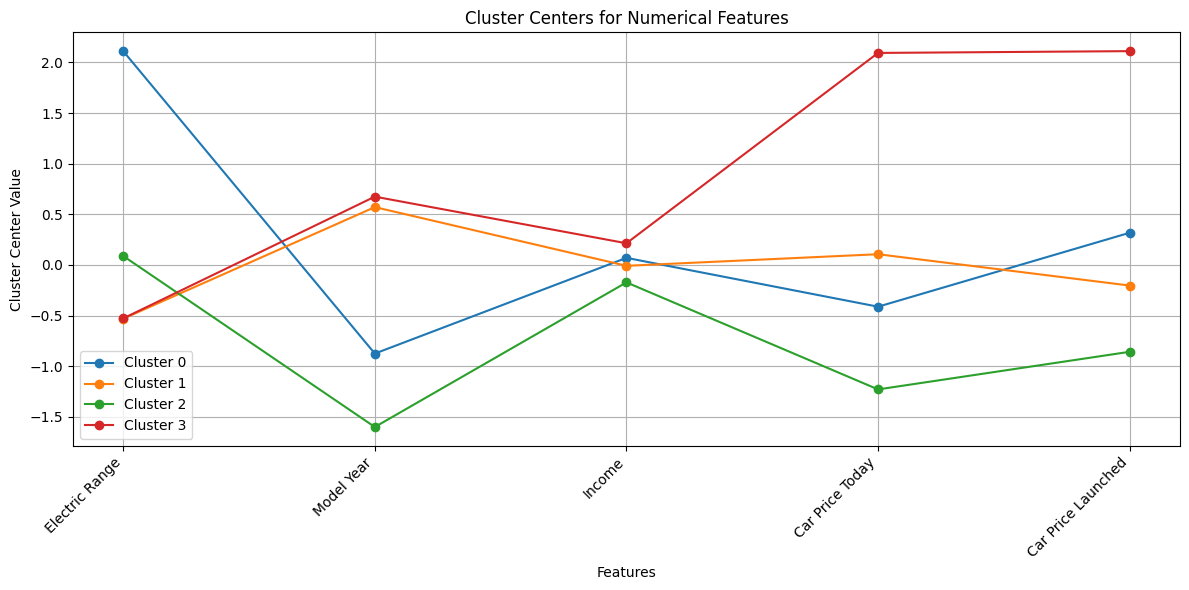

In [49]:
# Create a DataFrame from the cluster centers
df_cluster_centers = pd.DataFrame(kmeans_final.cluster_centers_, columns=[f"Feature_{i}" for i in range(kmeans_final.cluster_centers_.shape[1])])

# Get the indices of the numerical features in the combined feature matrix
numerical_feature_indices = list(range(len(numerical_columns)))

# Create a plot with cluster centers
plt.figure(figsize=(12, 6))
for cluster_num in range(4):
  plt.plot(df_cluster_centers.iloc[cluster_num, numerical_feature_indices], marker='o', label=f'Cluster {cluster_num}')

plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Cluster Center Value")
plt.title("Cluster Centers for Numerical Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

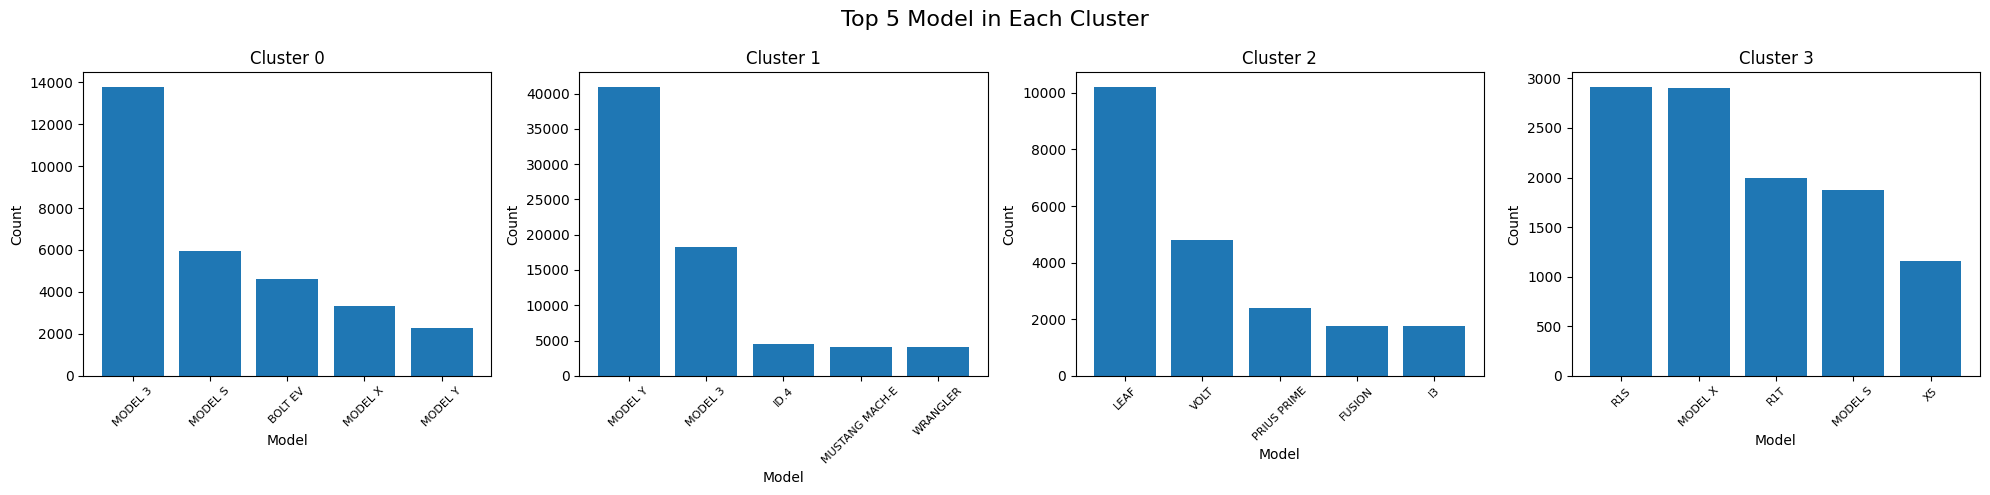

In [50]:
# comparitive plot for non numerical columns and value count of top 5 models in each of the clusters

import matplotlib.pyplot as plt

# Assuming data_relevant and categorical_columns are defined as in your code

# Function to plot top 5 models in each cluster
def plot_top_models_per_cluster(data, cluster_column, categorical_column):
  """Plots the top 5 models within each cluster."""

  fig, axs = plt.subplots(1, 4, figsize=(20, 5))
  fig.suptitle(f"Top 5 {categorical_column} in Each Cluster", fontsize=16)

  for cluster_num in range(4):
    cluster_data = data[data[cluster_column] == cluster_num]
    top_models = cluster_data[categorical_column].value_counts().head(5)
    axs[cluster_num].bar(top_models.index, top_models.values)
    axs[cluster_num].set_title(f"Cluster {cluster_num}")
    axs[cluster_num].tick_params(axis='x', rotation=45, labelsize=8)
    axs[cluster_num].set_xlabel(f"{categorical_column}")
    axs[cluster_num].set_ylabel("Count")

  plt.tight_layout()
  plt.show()

# Example: Plot top 5 models in each cluster
plot_top_models_per_cluster(data_relevant, 'Cluster', 'Model')


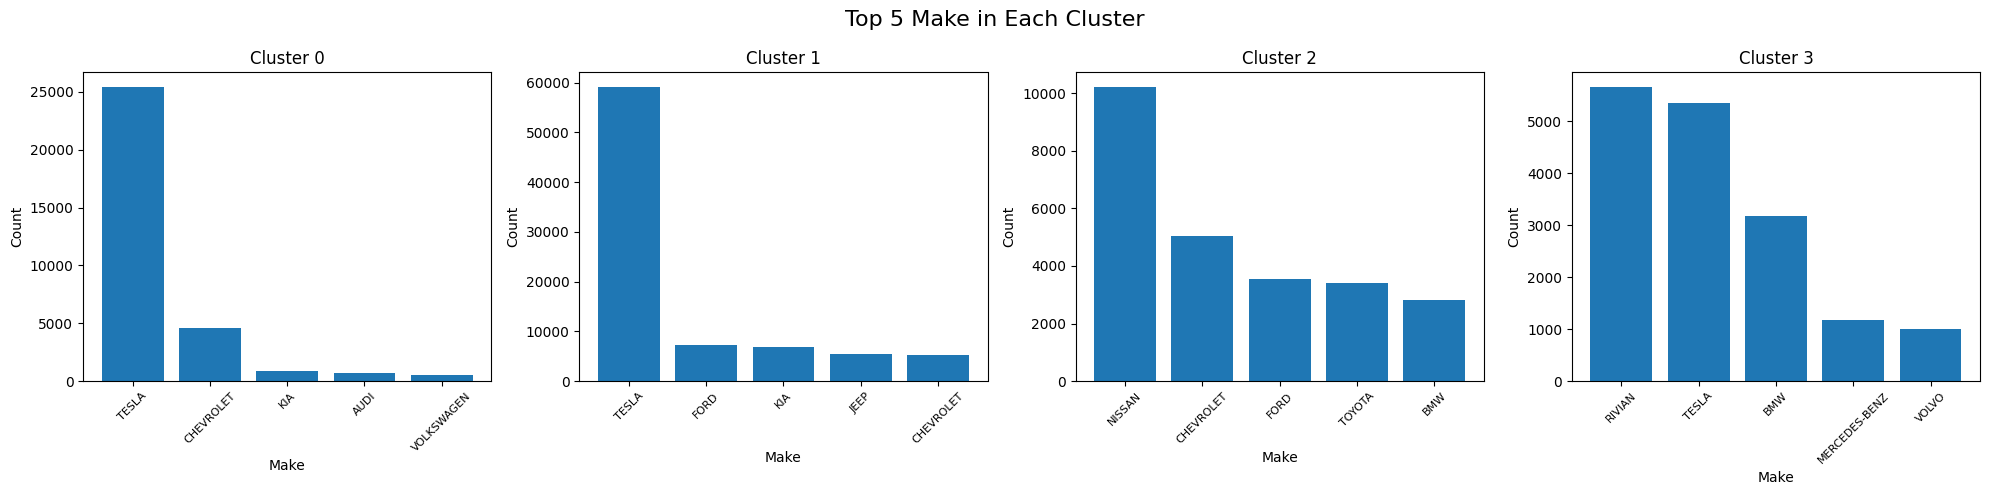

In [51]:
# Example: Plot top 5 make in each cluster
plot_top_models_per_cluster(data_relevant, 'Cluster', 'Make')

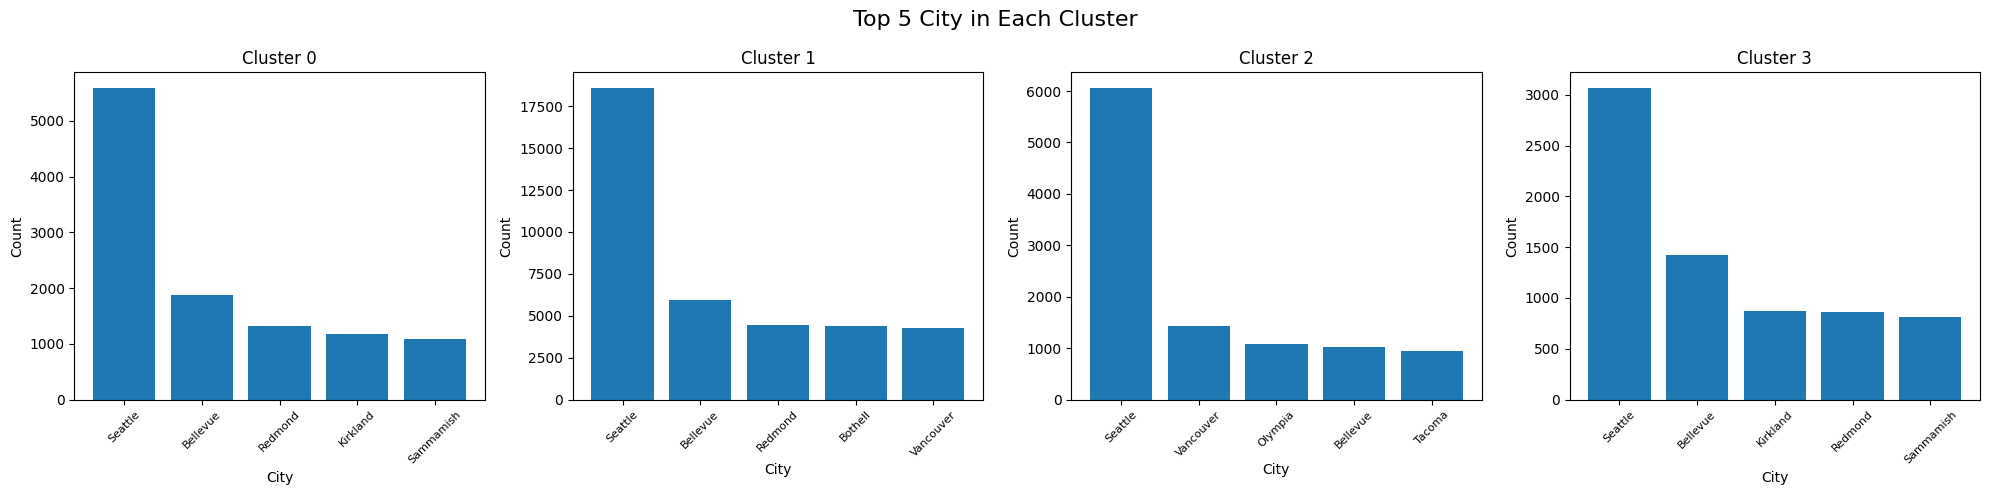

In [56]:
# Example: Plot top 5 city in each cluster
plot_top_models_per_cluster(data_relevant, 'Cluster', 'City')